In [68]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
from scipy.spatial.distance import cdist

plt.rcParams.update({'font.size': 15, 'figure.figsize' : (20, 20)})

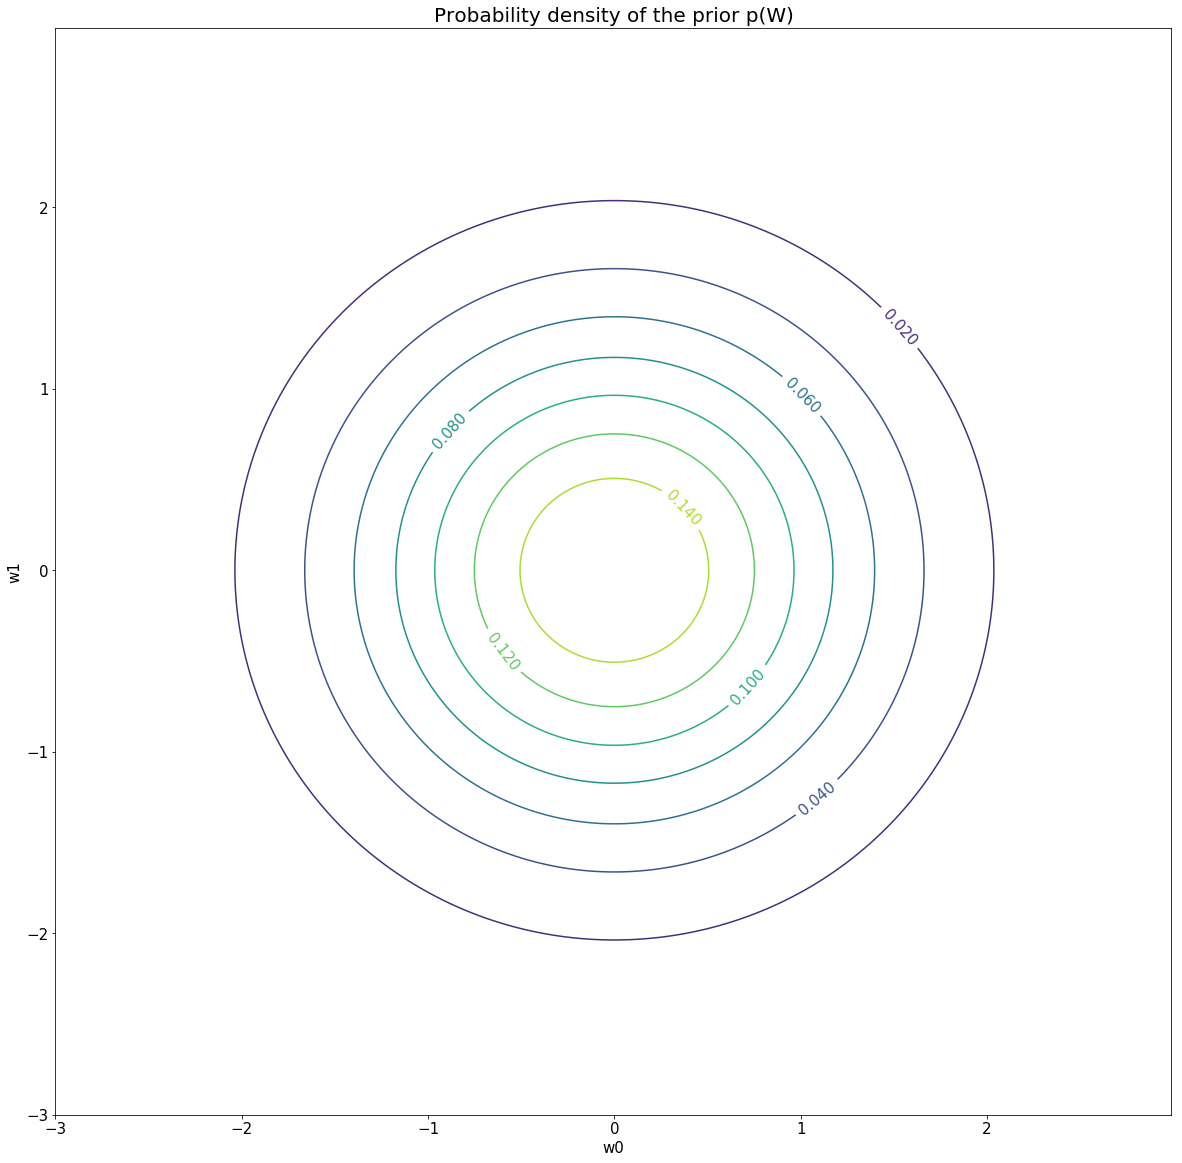

In [22]:
w0 = np.arange(-3.0, 3.0, 0.01)
w1 = np.arange(-3.0, 3.0, 0.01)
W0, W1 = np.meshgrid(w0, w1)
pos = np.dstack((W0, W1))
rv = stats.multivariate_normal([0, 0], [[1, 0], [0, 1]])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
CS = ax.contour(W0, W1, rv.pdf(pos))
ax.clabel(CS)
ax.set_title('Probability density of the prior p(W)', fontsize = 20)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
fig.savefig('Graphics/prior_distr_W.png')

In [23]:
sigma = 0.3
tau = 0.5

x = -0.5
y = -1.3 * x + 0.5 + np.random.normal(0, sigma ** 2)

X = np.matrix([[x, 1]])
Y = np.matrix([[y]])
S = np.linalg.inv(1/(sigma ** 2) * np.transpose(X) * X  + 1/(tau ** 2) * np.identity(2))
mu = 1/(sigma ** 2) * S * np.transpose(X) * Y
mu = np.array(np.transpose(mu))[0]

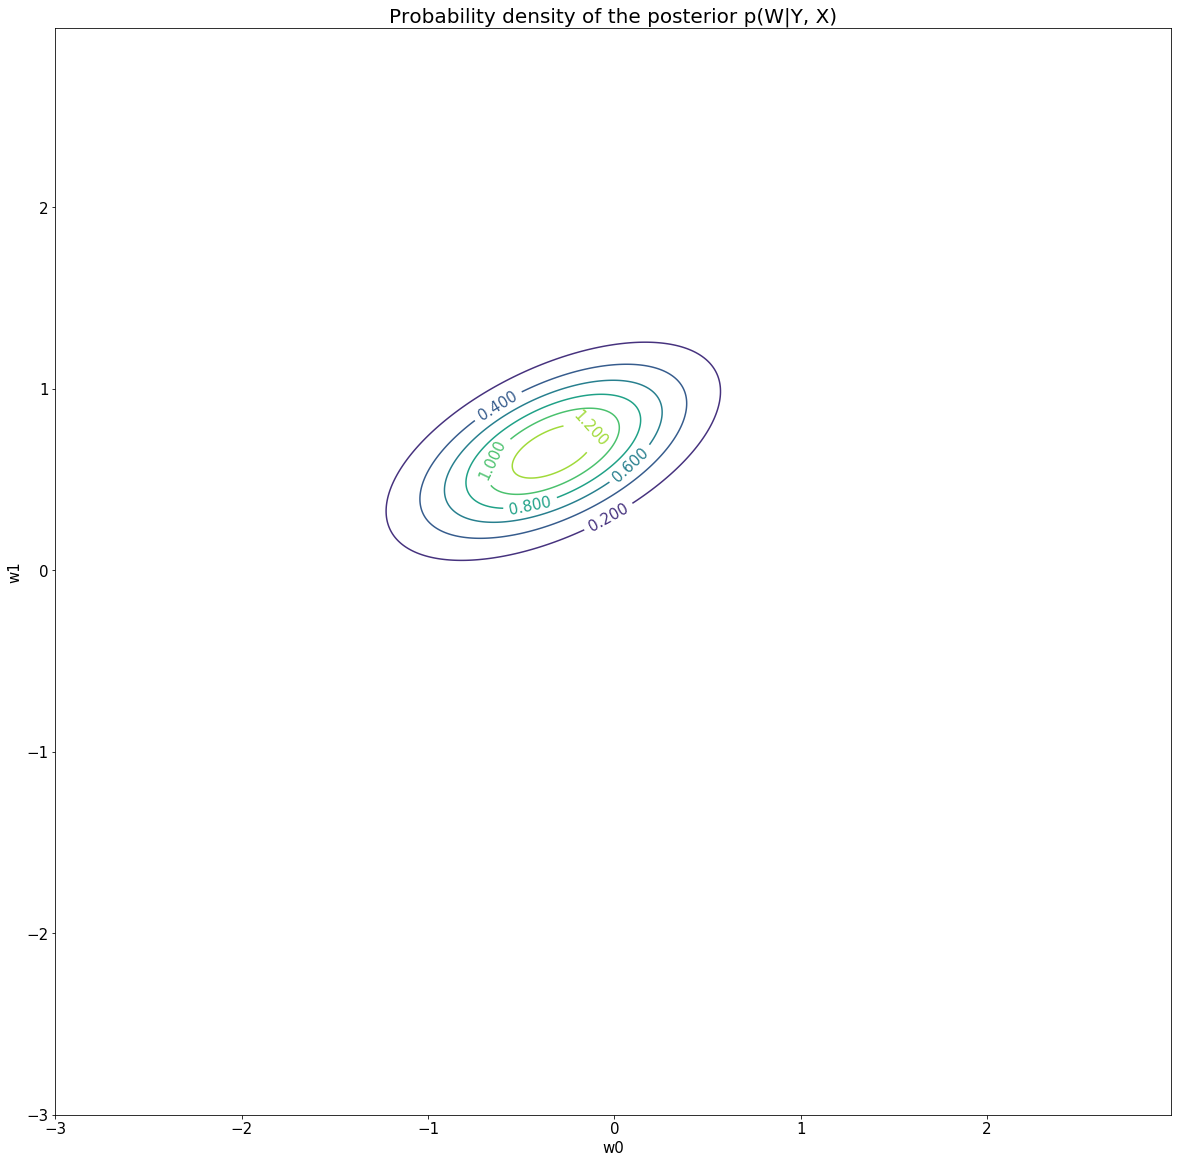

In [24]:
w0 = np.arange(-3.0, 3.0, 0.01)
w1 = np.arange(-3.0, 3.0, 0.01)
W0, W1 = np.meshgrid(w0, w1)
pos = np.dstack((W0, W1))
rv = stats.multivariate_normal(mu, S)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS = ax.contour(W0, W1, rv.pdf(pos))
ax.clabel(CS)
ax.set_title('Probability density of the posterior p(W|Y, X)',  fontsize = 20)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
fig.savefig('Graphics/posterior_distr_W.png')

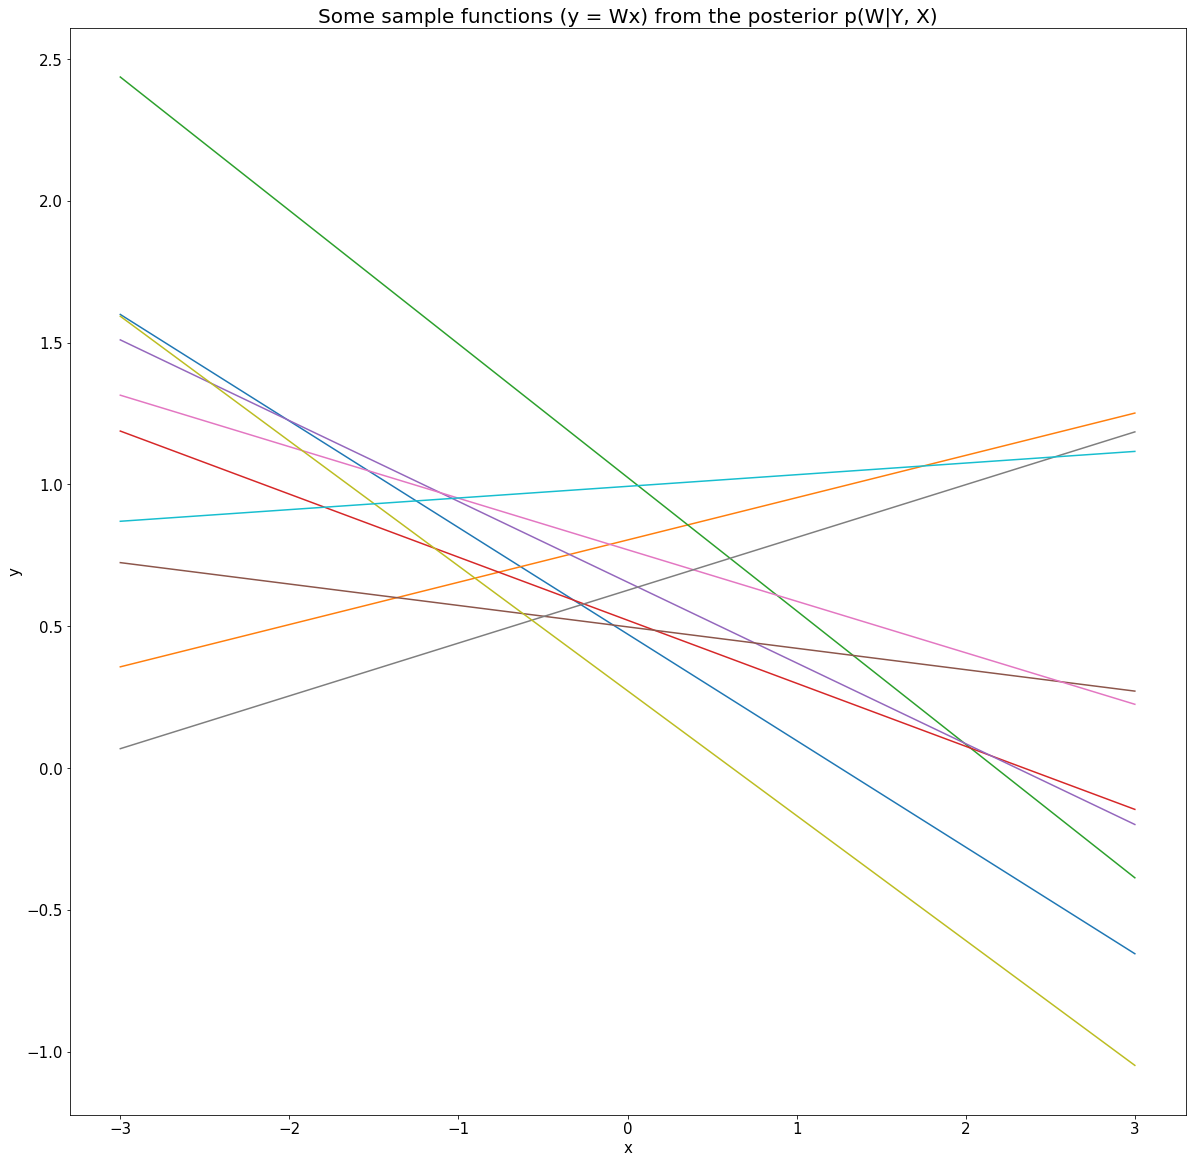

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 10):
    Wsample = np.random.multivariate_normal(mu, S)
    x = np.linspace(-3, 3, 100)
    X = np.dstack((x, np.ones(100)))[0]
    Y = np.matrix(X) * np.transpose(np.matrix(Wsample))
    ax.plot(x, Y)
ax.set_title('Some sample functions (y = Wx) from the posterior p(W|Y, X)',  fontsize = 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.savefig('Graphics/posterior_function0.png')

In [26]:
X = np.matrix([[-0.5, 1], [0.5, 1], [0.9, 1]])
error = np.transpose(np.matrix(np.random.multivariate_normal([0, 0, 0],  (sigma ** 2) * np.identity(3))))
Y = X * np.transpose(np.matrix([-1.3, 0.5])) + error
S = np.linalg.inv(1/(sigma**2) * np.transpose(X) * X  + 1/(tau ** 2) * np.identity(2))
mu = 1/(sigma**2) * S * np.transpose(X) * Y
mu = np.array(np.transpose(mu))[0]

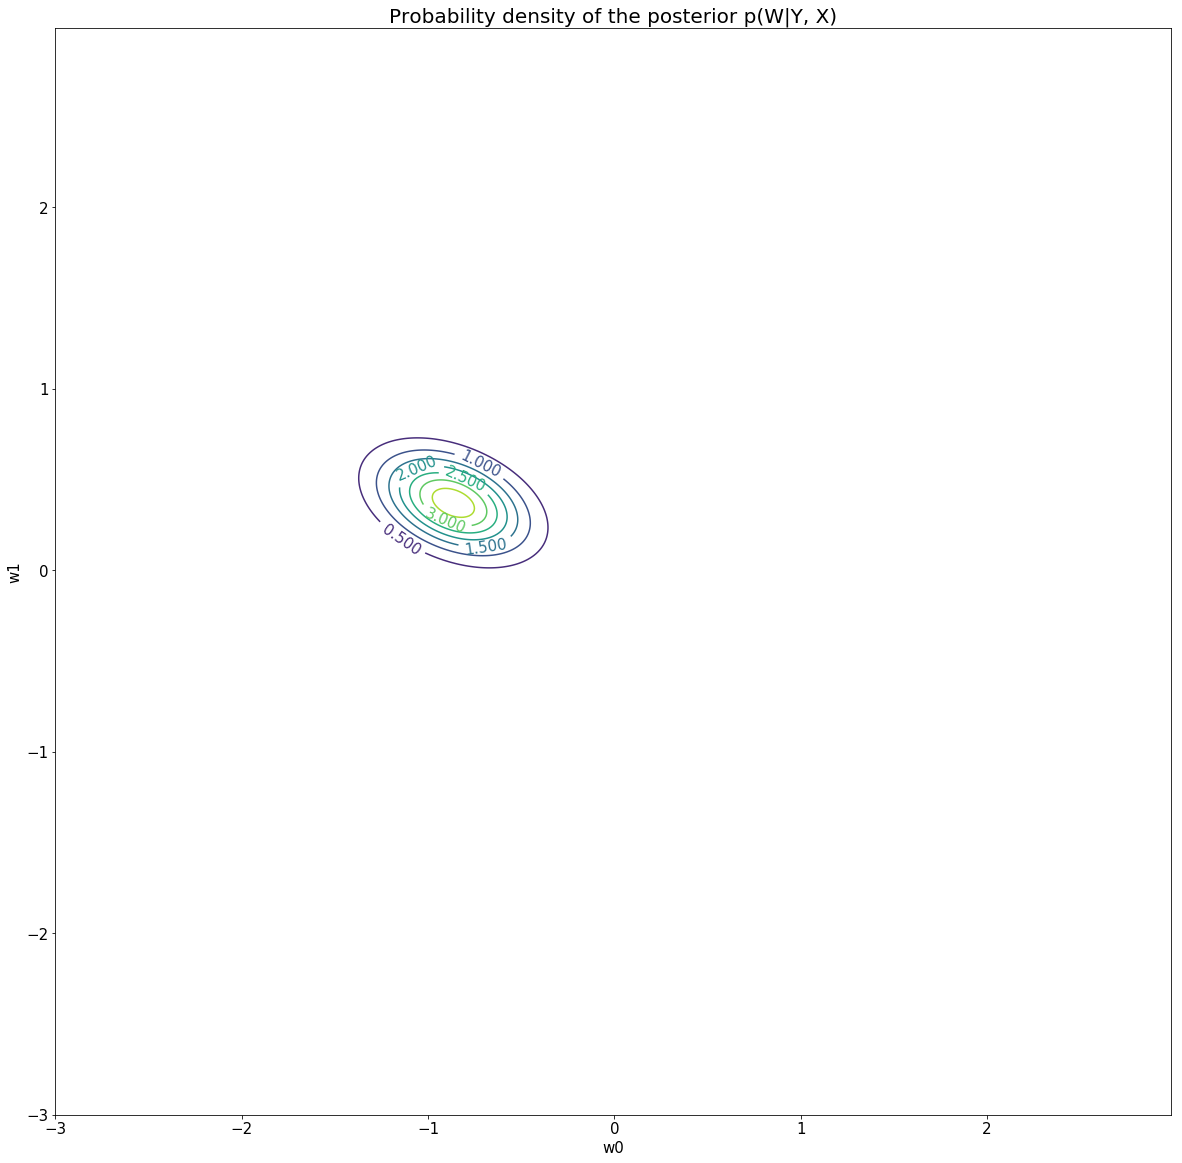

In [27]:
w0 = np.arange(-3.0, 3.0, 0.01)
w1 = np.arange(-3.0, 3.0, 0.01)
W0, W1 = np.meshgrid(w0, w1)
pos = np.dstack((W0, W1))
rv = stats.multivariate_normal(mu, S)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
CS = ax.contour(W0, W1, rv.pdf(pos))
ax.clabel(CS)
ax.set_title('Probability density of the posterior p(W|Y, X)',  fontsize = 20)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
fig.savefig('Graphics/posterior2_distr_W.png')

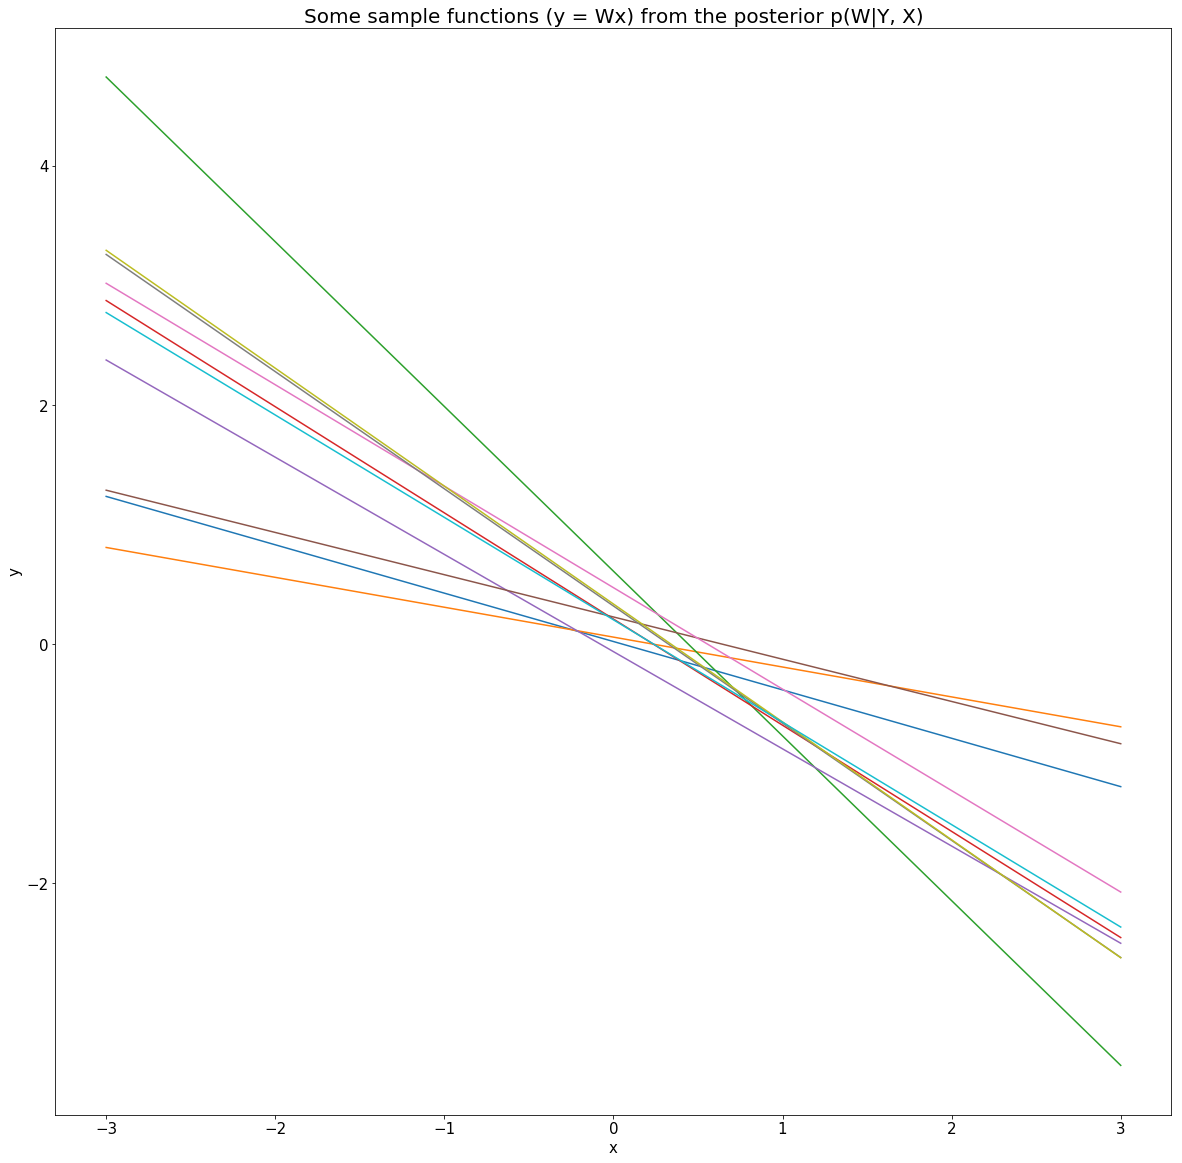

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 10):
    Wsample = np.random.multivariate_normal(mu, S)
    x = np.linspace(-3, 3, 100)
    X = np.dstack((x, np.ones(100)))[0]
    Y = np.matrix(X) * np.transpose(np.matrix(Wsample))
    ax.plot(x, Y)
ax.set_title('Some sample functions (y = Wx) from the posterior p(W|Y, X)',  fontsize = 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.savefig('Graphics/posterior_function1.png')

In [66]:
def k(xi, xj, theta):
    sigmaf2 = theta[0] ** 2
    l2 = theta[1] ** 2
    return sigmaf2 * np.exp(-cdist(xi, xj)/l2)

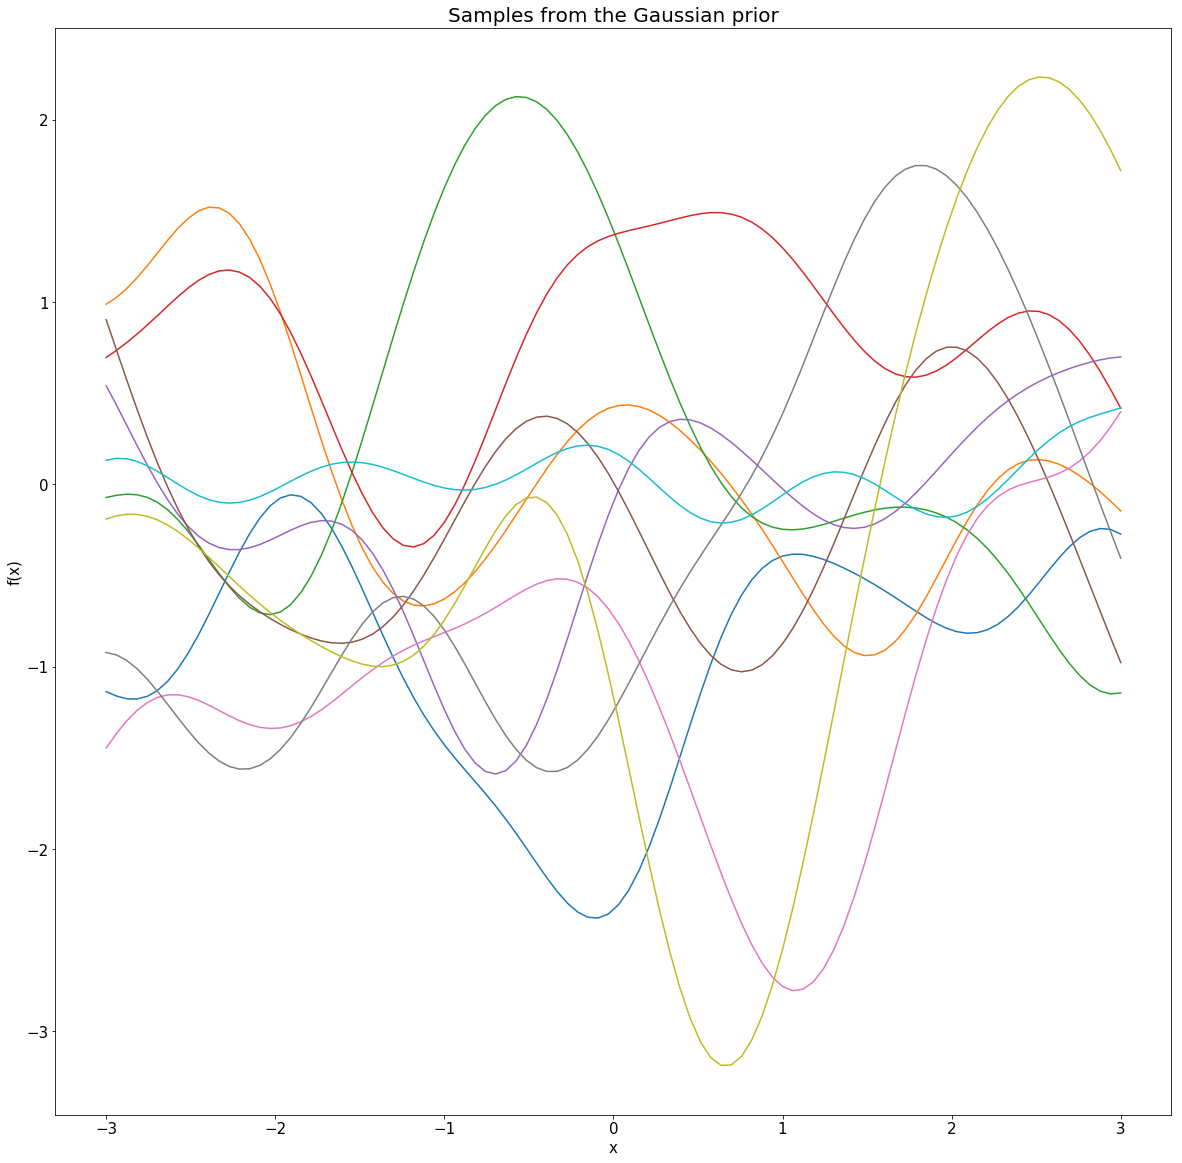

In [30]:
X = np.linspace(-3, 3, 100)
theta = [1, 1]
k(X, X, theta)
cov = np.reshape([k(xi, xj, theta) for xi in X for xj in X], (100, 100))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 10):
    Y = np.random.multivariate_normal(np.zeros(100), cov)
    ax.plot(X, Y)
ax.set_title('Samples from the Gaussian prior',  fontsize = 20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('Graphics/Gaussian_prior.png')

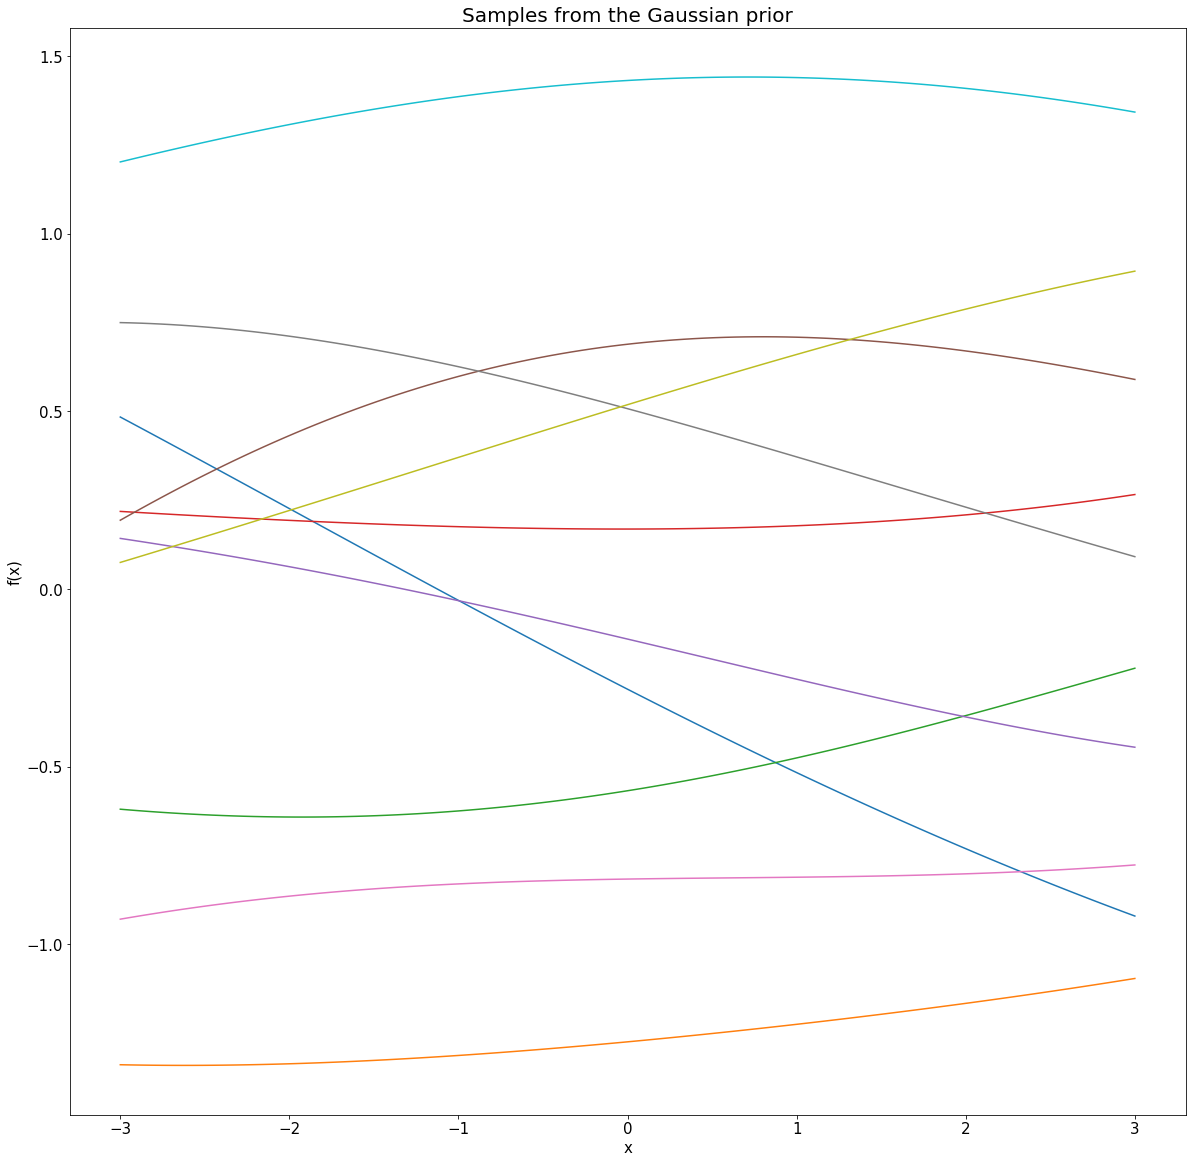

In [31]:
X = np.linspace(-3, 3, 100)
theta = [1, 10]
k(X, X, theta)
cov = np.reshape([k(xi, xj, theta) for xi in X for xj in X], (100, 100))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 10):
    Y = np.random.multivariate_normal(np.zeros(100), cov)
    ax.plot(X, Y)
ax.set_title('Samples from the Gaussian prior',  fontsize = 20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('Graphics/Gaussian_prior2.png')

In [133]:
sigma = 0.1
X = np.linspace(-np.pi, np.pi, 7).reshape(-1, 1)
Y = np.zeros(X.shape)
for i in range(7):
    Y[i] = np.sin(X[i]) + np.random.normal(0, sigma ** 2)

xs = np.transpose(np.linspace(-np.pi, np.pi, 100)).reshape(-1, 1)

K = k(X, X, theta) + ((sigma ** 2) * np.identity(7))
Ks = k(X, xs, theta)
Kss = k(xs, xs, theta)

mu = np.dot(np.dot(Ks.T, np.linalg.inv(K)), Y)

cov = Kss - np.dot(np.dot(Ks.T, np.linalg.inv(K)), Ks)


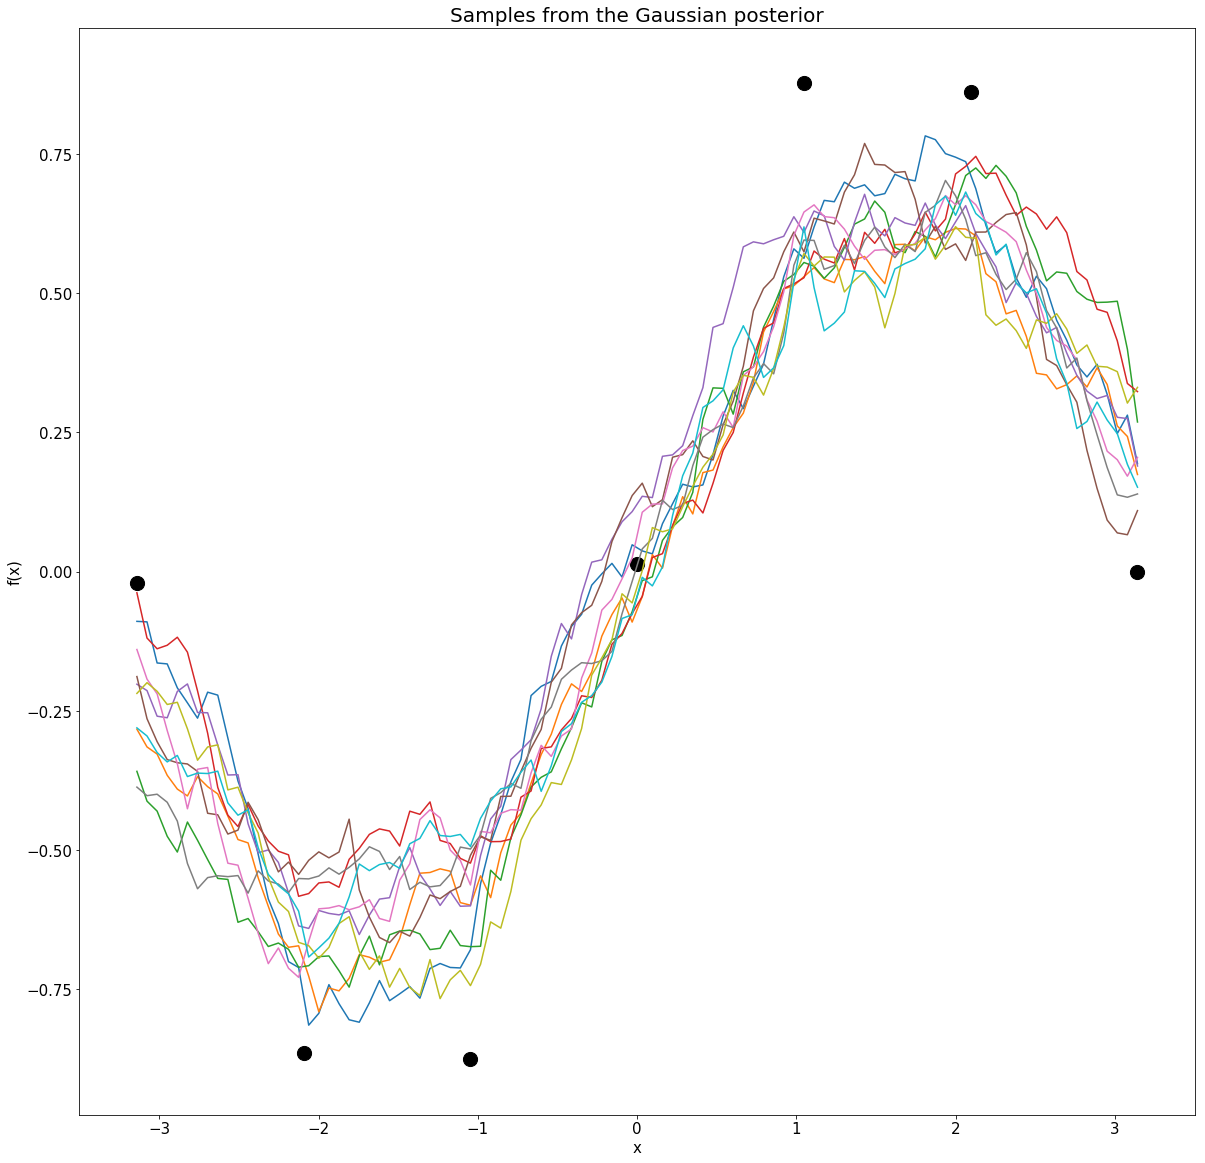

In [134]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0, 10):
    y = np.random.multivariate_normal(mu.flatten(), cov)
    ax.plot(xs, y)
ax.set_title('Samples from the Gaussian posterior',  fontsize = 20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.scatter(X, Y, s=200, c='black')
fig.savefig('Graphics/Gaussian_posterior.png')